## COURSE PROJECT CS533 --Predicting the treatment charges before admitting a patient.

As the cost of health care services continues to rise, having the ability to compare prices at different medical institutions in their area would greatly benefit people
by allowing them to plan their finances before seeking treatment. This would not only help patients but also benefit medical facility providers by enabling them to offer better customer service. Additionally, insurance companies would be able to better predict and provide financial support for their customers during
medical emergencies.

In [ ]:
# Importing the basic libraries we will require for the project

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import csv,json;
import os;
import openpyxl;
pd.set_option('display.max_columns', None) #displaying all column on a dataset
pd.set_option('display.max_rows', None) #displaying all rows on a dataset
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Mounting the google drive
from google.colab import drive

try:
  drive.mount('/content/drive')
except:
  # If that fails, use force_remount:
  drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#connecting to the dataframe of raw data
df = pd.read_excel('/content/drive/My Drive/COURSE_PROJECT/Dataset.xlsx', sheet_name="MH-Raw Data")


In [ ]:
df.head()

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,PAST MEDICAL HISTORY CODE,HB,UREA,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,NaN,11.4,33.0,0.8,AMBULANCE,ALERT,EMERGENCY,660293.0,25,12,13,Y,38000
1,2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,NaN,11.4,95.0,1.7,AMBULANCE,ALERT,EMERGENCY,809130.0,41,20,21,Y,39690
2,3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,Diabetes2,11.8,15.0,0.8,WALKED IN,ALERT,ELECTIVE,362231.0,18,9,9,N,0
3,4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,hypertension1,11.8,74.0,1.5,AMBULANCE,ALERT,EMERGENCY,629990.0,14,13,1,Y,89450
4,5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,Diabetes2,10.0,48.0,1.9,AMBULANCE,ALERT,EMERGENCY,444876.0,24,12,12,N,0


In [ ]:
df=df.drop(columns=['SL.'])

In [ ]:
df.shape #checking the number of columns and rows in the dataset

(248, 23)

In [ ]:
df.columns  #checking the columns(features) in the dataset

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL COST TO HOSPITAL ', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'COST OF IMPLANT'],
      dtype='object')

In [ ]:
df_data_description = pd.read_excel('/content/drive/My Drive/COURSE_PROJECT/Dataset.xlsx', sheet_name="Data Description")
df_data_description #showing descriptions of the data columns

,Unnamed: 0,Unnamed: 1
0,NaN,This file has the following three sheets
1,NaN,1. Data Description sheet: Provides data dicti...
2,NaN,2. Raw data : Contains information about 248 p...
3,NaN,3. Modified data: Raw data is modified data by...
4,NaN,NaN
5,Data Code,Description
6,AGE,Age of the patient
7,GENDER,Gender code for patient:
8,NaN,Male
9,NaN,Female


In [ ]:
df.dtypes #checking the data types of the columns

,0
AGE,float64
GENDER,object
MARITAL STATUS,object
KEY COMPLAINTS -CODE,object
BODY WEIGHT,float64
BODY HEIGHT,int64
HR PULSE,int64
BP -HIGH,float64
BP-LOW,float64
RR,int64


In [ ]:
df.describe()

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT
count,248.000000,248.000000,248.000000,248.000000,225.000000,225.000000,248.000000,246.000000,235.000000,215.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,28.879837,37.524677,130.221774,92.229839,115.022222,71.875556,23.540323,12.894553,26.581702,0.746977,198723.330282,11.612903,3.475806,8.153226,8544.201613
std,25.899359,23.118822,39.170901,20.308740,22.536368,15.313176,3.840756,3.083237,15.998367,0.548641,122587.492984,5.392617,3.853520,3.755793,21521.877503
min,0.032877,2.020000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,46093.000000,3.000000,0.000000,0.000000,0.000000
25%,6.000000,15.000000,105.000000,78.000000,100.000000,60.000000,22.000000,11.300000,18.000000,0.300000,131652.750000,8.000000,1.000000,6.000000,0.000000
50%,15.500000,40.900000,147.500000,90.000000,110.000000,70.000000,24.000000,12.350000,22.000000,0.700000,162660.500000,10.000000,2.000000,7.000000,0.000000
75%,55.000000,58.250000,160.000000,104.000000,130.000000,80.000000,24.000000,14.000000,30.000000,1.000000,220614.000000,13.000000,4.000000,10.000000,0.000000
max,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.000000,25.700000,143.000000,5.200000,887350.000000,41.000000,30.000000,22.000000,196848.000000


In [ ]:
# count and percentages of female and male patients

gender_counts = df['GENDER'].value_counts()  # Absolute counts
gender_percentages = df['GENDER'].value_counts(normalize=True) * 100  # Percentages

# Combine both into a single DataFrame
gender_distribution = pd.DataFrame({
    'Count': gender_counts,
    'Percentage (%)': gender_percentages
})

# Display the result
print(gender_distribution)

        Count  Percentage (%)
GENDER                       
M         166       66.935484
F          82       33.064516


In [ ]:
# count and percentages of marital status of patients

marital_counts = df['MARITAL STATUS'].value_counts()  # Absolute counts
marital_percentages = df['MARITAL STATUS'].value_counts(normalize=True) * 100  # Percentages

# Combine both into a single DataFrame
marital_distribution = pd.DataFrame({
    'Count': marital_counts,
    'Percentage (%)': marital_percentages
})

# Display the result
print(marital_distribution)

                Count  Percentage (%)
MARITAL STATUS                       
UNMARRIED         140       56.451613
MARRIED           108       43.548387


In [ ]:
# count and percentages of type of admission of patients

admission_counts = df['TYPE OF ADMSN'].value_counts()  # Absolute counts
admission_percentages = df['TYPE OF ADMSN'].value_counts(normalize=True) * 100  # Percentages

# Combine both into a single DataFrame
admission_distribution = pd.DataFrame({
    'Count': admission_counts,
    'Percentage (%)': admission_percentages
})

# Display the result
print(admission_distribution)

               Count  Percentage (%)
TYPE OF ADMSN                       
ELECTIVE         216       87.096774
EMERGENCY         32       12.903226


In [ ]:
# count and percentages of mode of arrival of patients

arrival_counts = df['MODE OF ARRIVAL'].value_counts()  # Absolute counts
arrival_percentages = df['MODE OF ARRIVAL'].value_counts(normalize=True) * 100  # Percentages

# Combine both into a single DataFrame
arrival_distribution = pd.DataFrame({
    'Count': arrival_counts,
    'Percentage (%)': arrival_percentages
})

# Display the result
print(arrival_distribution)

                 Count  Percentage (%)
MODE OF ARRIVAL                       
WALKED IN          214       86.290323
AMBULANCE           30       12.096774
TRANSFERRED          4        1.612903


In [ ]:
# count and percentages of mode of arrival of patients

state_at_arrival_counts = df['STATE AT THE TIME OF ARRIVAL'].value_counts()  # Absolute counts
state_at_arrival_percentages = df['STATE AT THE TIME OF ARRIVAL'].value_counts(normalize=True) * 100  # Percentages

# Combine both into a single DataFrame
state_at_arrival_distribution = pd.DataFrame({
    'Count': state_at_arrival_counts,
    'Percentage (%)': state_at_arrival_percentages
})

# Display the result
print(state_at_arrival_distribution)

                              Count  Percentage (%)
STATE AT THE TIME OF ARRIVAL                       
ALERT                           247       99.596774
CONFUSED                          1        0.403226


## Data Exploration

In [ ]:
# Creating the age groups
# Defining age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-17', '18-29', '30-49', '50-69', '70+']

# Create a new column with age groups
df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Counting the number of patients in each age group
age_group_counts = df['Age_Group'].value_counts()
print(age_group_counts)

Age_Group
0-17     131
70+       47
50-69     43
30-49     16
18-29     11
Name: count, dtype: int64


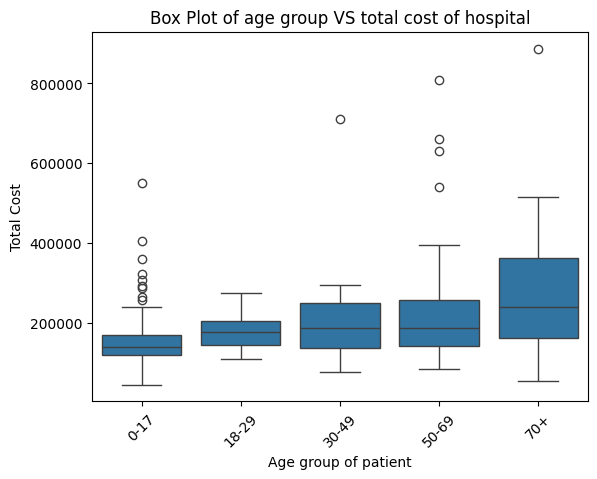

In [ ]:
#Box plot to show the relationship between the age group and total cost of hospital
sns.boxplot(x='Age_Group', y='TOTAL COST TO HOSPITAL ', data=df)
plt.title('Box Plot of age group VS total cost of hospital')
plt.ylabel('Total Cost')
plt.xlabel('Age group of patient')
plt.xticks(rotation=45)  # If admission types are long
plt.show()

#Interpretation: From the figure below,the charges of the hospital increase as the age group increases i.e 0-17 patients had the least median charges,
# yet 70+ patients have the highest median charges

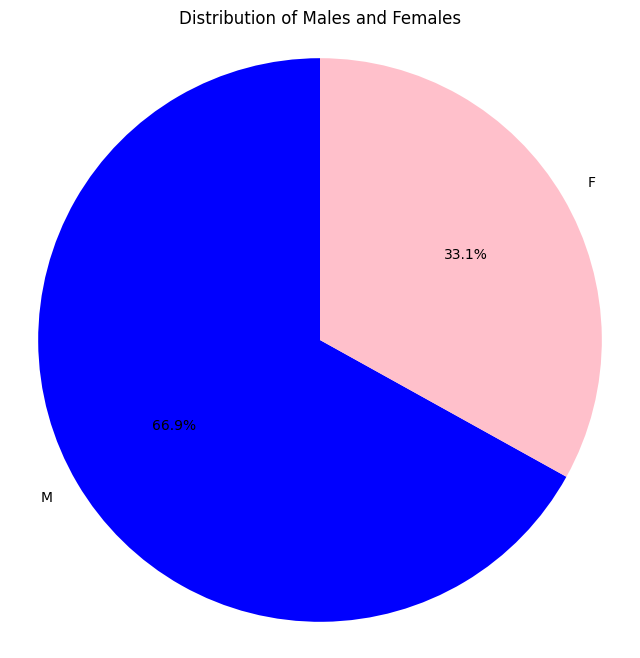

In [ ]:
# Pie chart for Gender feature, demographic feature

# Data for the pie chart
labels = gender_distribution.index
sizes = gender_distribution['Count']
colors = ['blue', 'pink']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Title
plt.title('Distribution of Males and Females')

# Show the chart
plt.show()

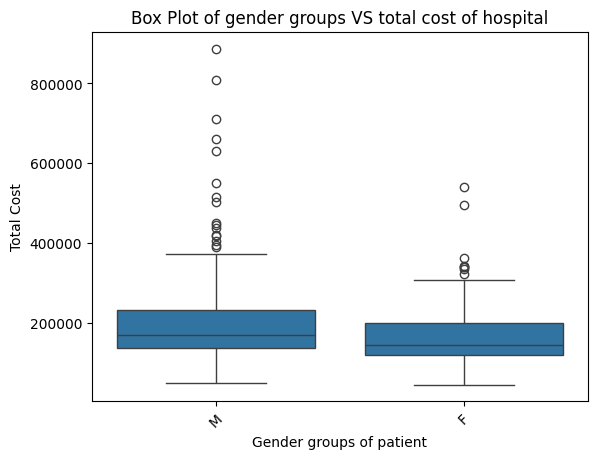

In [ ]:
#Box plot to show the relationship between the gender and total cost of hospital
sns.boxplot(x='GENDER', y='TOTAL COST TO HOSPITAL ', data=df)
plt.title('Box Plot of gender groups VS total cost of hospital')
plt.ylabel('Total Cost')
plt.xlabel('Gender groups of patient')
plt.xticks(rotation=45)  # If admission types are long
plt.show()

#Interpretation: From the figure below,the charges of the hospital are higher for female patients.

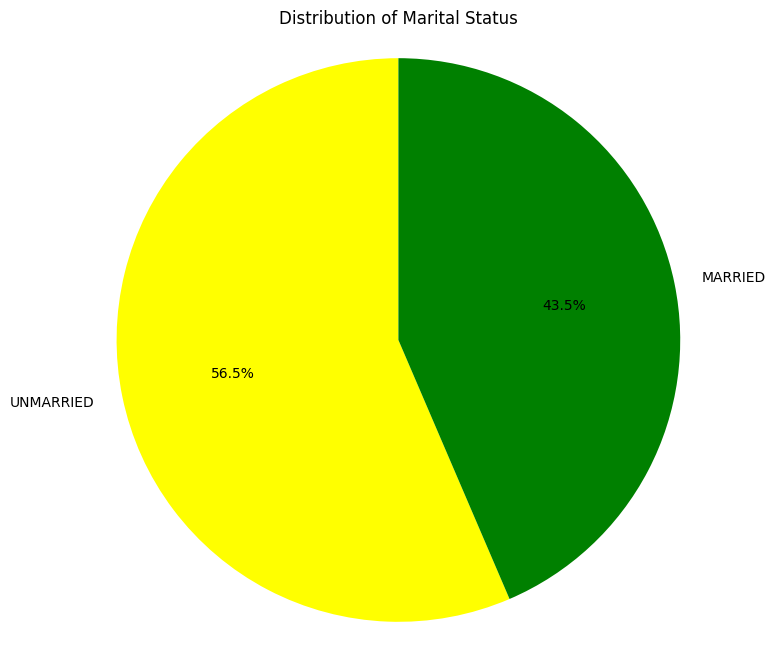

In [ ]:
# Pie chart for Marital Status feature, demographic feature

# Data for the pie chart
labels = marital_distribution.index
sizes = marital_distribution['Count']
colors = ['yellow', 'green']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Title
plt.title('Distribution of Marital Status')

# Show the chart
plt.show()

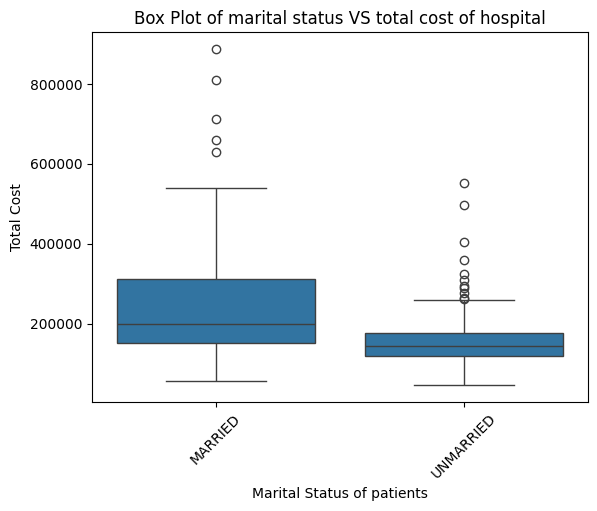

In [ ]:
#Box plot to show the relationship between the maritral status and total cost of hospital
sns.boxplot(x='MARITAL STATUS', y='TOTAL COST TO HOSPITAL ', data=df)
plt.title('Box Plot of marital status VS total cost of hospital')
plt.ylabel('Total Cost')
plt.xlabel('Marital Status of patients')
plt.xticks(rotation=45)  # If admission types are long
plt.show()

#Interpretation: From the figure below,the charges of the hospital are higher for married patients.

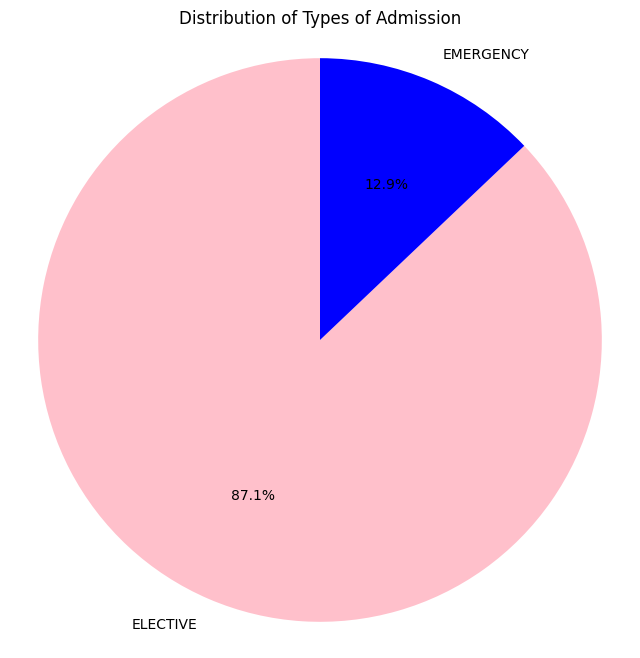

In [ ]:
# Pie chart for Type of Admission feature, clinical or administrative feature

# Data for the pie chart
labels = admission_distribution.index
sizes = admission_distribution['Count']
colors = ['pink', 'blue']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Title
plt.title('Distribution of Types of Admission')

# Show the chart
plt.show()

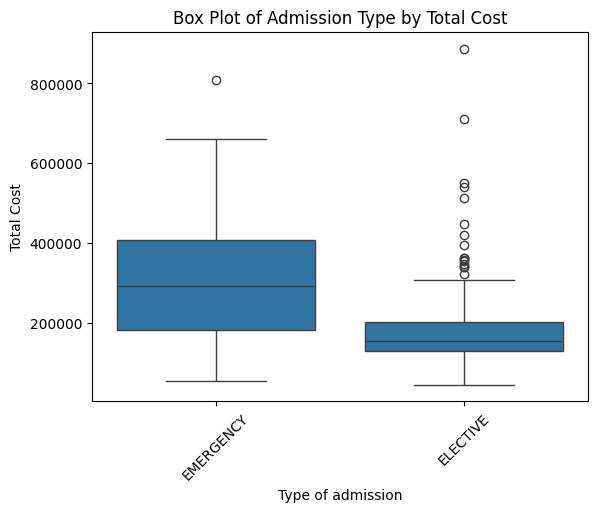

In [ ]:
#Box plot to show the relationship between the type of admission and the cost to hospital
sns.boxplot(x='TYPE OF ADMSN', y='TOTAL COST TO HOSPITAL ', data=df)
plt.title('Box Plot of Admission Type by Total Cost')
plt.ylabel('Total Cost')
plt.xlabel('Type of admission')
plt.xticks(rotation=45)
plt.show()

#Interpretation: From the Box plot below,the charges of the hospital are higher for emergency cases.

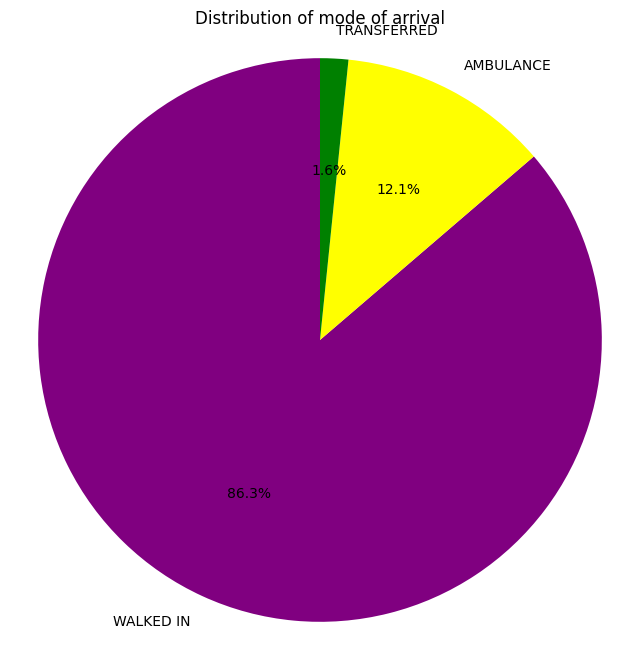

In [ ]:
# Pie chart for mode of arrival feature, clinical or administrative feature

# Data for the pie chart
labels = arrival_distribution.index
sizes = arrival_distribution['Count']
colors = ['purple', 'yellow','green']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Title
plt.title('Distribution of mode of arrival')

# Show the chart
plt.show()


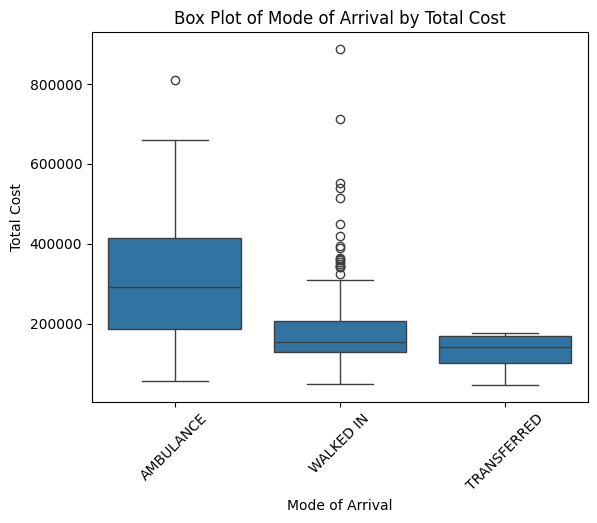

In [ ]:
#Box plot to show the relationship between the mode of arrival and the cost to hospital
sns.boxplot(x='MODE OF ARRIVAL', y='TOTAL COST TO HOSPITAL ', data=df)
plt.title('Box Plot of Mode of Arrival by Total Cost')
plt.ylabel('Total Cost')
plt.xlabel('Mode of Arrival')
plt.xticks(rotation=45)
plt.show()

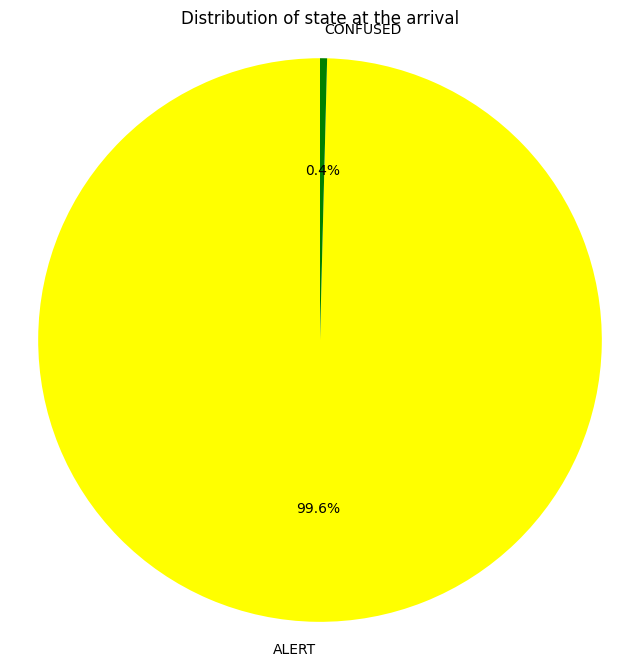

In [ ]:
# Pie chart for state of the time of arrival feature, clinical feature

# Data for the pie chart
labels = state_at_arrival_distribution.index
sizes = state_at_arrival_distribution['Count']
colors = ['yellow', 'green']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Title
plt.title('Distribution of state at the arrival')

# Show the chart
plt.show()

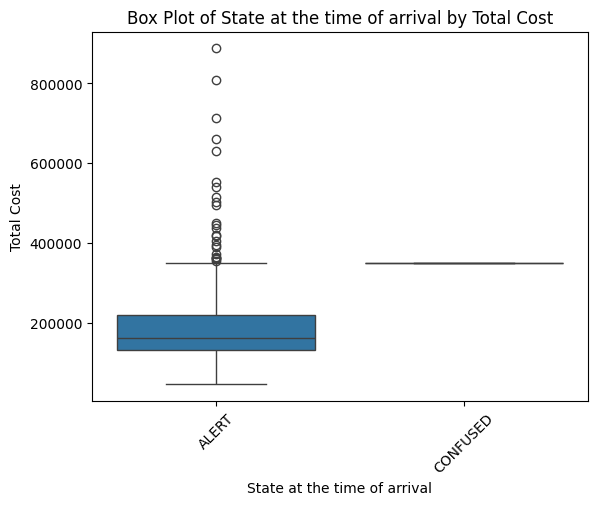

In [ ]:
#Box plot to show the relationship between the mode of arrival and the cost to hospital
sns.boxplot(x='STATE AT THE TIME OF ARRIVAL', y='TOTAL COST TO HOSPITAL ', data=df)
plt.title('Box Plot of State at the time of arrival by Total Cost')
plt.ylabel('Total Cost')
plt.xlabel('State at the time of arrival')
plt.xticks(rotation=45)
plt.show()

Correlation- Independent variables VS Dependent Variable
(only for Numerical Features)

In [ ]:
# Select only numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Remove the dependent variable from the list of numerical features if it's included
numerical_features = [feature for feature in numerical_features if feature != 'TOTAL COST TO HOSPITAL ']

# Calculate correlations with the dependent variable
correlations = df[numerical_features + ['TOTAL COST TO HOSPITAL ']].corr()['TOTAL COST TO HOSPITAL '].drop('TOTAL COST TO HOSPITAL ')

# Sort correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)

LENGTH OF STAY - ICU    0.821995
TOTAL LENGTH OF STAY    0.698709
COST OF IMPLANT         0.483825
AGE                     0.420697
CREATININE              0.377611
BODY WEIGHT             0.348270
BODY HEIGHT             0.293828
UREA                    0.276581
BP -HIGH                0.182876
LENGTH OF STAY- WARD    0.160676
BP-LOW                  0.158195
RR                      0.016181
HR PULSE               -0.008536
HB                     -0.061601
Name: TOTAL COST TO HOSPITAL , dtype: float64


## Data processing

In [ ]:
#Checking columns with missing values

missing = df.isnull().sum() # Count of missing values

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a single DataFrame
missing_data = pd.DataFrame({
    'Missing Count': missing,
    'Percentage (%)': missing_percentage
})

print(missing_data)

                              Missing Count  Percentage (%)
AGE                                       0        0.000000
GENDER                                    0        0.000000
MARITAL STATUS                            0        0.000000
KEY COMPLAINTS -CODE                     36       14.516129
BODY WEIGHT                               0        0.000000
BODY HEIGHT                               0        0.000000
HR PULSE                                  0        0.000000
BP -HIGH                                 23        9.274194
BP-LOW                                   23        9.274194
RR                                        0        0.000000
PAST MEDICAL HISTORY CODE               173       69.758065
HB                                        2        0.806452
UREA                                     13        5.241935
CREATININE                               33       13.306452
MODE OF ARRIVAL                           0        0.000000
STATE AT THE TIME OF ARRIVAL            

In [ ]:
df.shape

(248, 24)

Handling missing values

In [ ]:
#Dropping columns with many missing values when the missing percentage is more than 65% and contribution to the cost of charges
df = df.drop(columns=['PAST MEDICAL HISTORY CODE'])

In [ ]:
df.shape

(248, 23)

In [ ]:
#Dropping rows with missing data
df = df.dropna()
df = df.drop(columns=['Age_Group'])

In [ ]:
df.shape #checking the reduced rows after dropping the rows with missing data

(163, 22)

In [ ]:
print(df)

           AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  \
0    58.000000      M        MARRIED         other- heart         49.2   
1    59.000000      M        MARRIED              CAD-DVD         41.0   
2    82.000000      M        MARRIED              CAD-TVD         46.6   
3    46.000000      M        MARRIED              CAD-DVD         80.0   
4    60.000000      M        MARRIED              CAD-DVD         58.0   
5    75.000000      M        MARRIED              CAD-DVD         45.0   
6    73.000000      M        MARRIED              CAD-TVD         60.0   
7    71.000000      M        MARRIED              CAD-TVD         43.8   
8    72.000000      M        MARRIED              CAD-DVD         72.0   
9    61.000000      M        MARRIED              CAD-TVD         76.6   
10   61.000000      M        MARRIED              CAD-DVD         64.0   
11   45.000000      F        MARRIED         other- heart         50.0   
12   40.000000      M        MARRIED  

Encoding Categorical Variables

In [ ]:
# List of categorical columns to encode
categorical_columns = ['GENDER', 'MARITAL STATUS', 'TYPE OF ADMSN','KEY COMPLAINTS -CODE', 'STATE AT THE TIME OF ARRIVAL',
                       'IMPLANT USED (Y/N)','KEY COMPLAINTS -CODE','MODE OF ARRIVAL']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Check the result
print(df[categorical_columns].head())

   GENDER  MARITAL STATUS  TYPE OF ADMSN  KEY COMPLAINTS -CODE  \
0       1               0              1                     8   
1       1               0              1                     1   
2       1               0              0                     3   
3       1               0              1                     1   
4       1               0              1                     1   

   STATE AT THE TIME OF ARRIVAL  IMPLANT USED (Y/N)  KEY COMPLAINTS -CODE  \
0                             0                   1                     8   
1                             0                   1                     1   
2                             0                   0                     3   
3                             0                   1                     1   
4                             0                   0                     1   

   MODE OF ARRIVAL  
0                0  
1                0  
2                2  
3                0  
4                0  


In [ ]:
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,58.0,1,0,8,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,0,0,1,660293.0,25,12,13,1,38000
1,59.0,1,0,1,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,0,0,1,809130.0,41,20,21,1,39690
2,82.0,1,0,3,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,2,0,0,362231.0,18,9,9,0,0
3,46.0,1,0,1,80.0,173,122,110.0,80.0,24,11.8,74.0,1.5,0,0,1,629990.0,14,13,1,1,89450
4,60.0,1,0,1,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,0,0,1,444876.0,24,12,12,0,0


Modeling with different regressors

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'HB', 'UREA', 'CREATININE', 'MODE OF ARRIVAL',
       'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL COST TO HOSPITAL ', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'COST OF IMPLANT'],
      dtype='object')

In [ ]:
X = df.drop(columns=['TOTAL COST TO HOSPITAL '])  # Excluding the target column from the rest of the dataset
y = df['TOTAL COST TO HOSPITAL ']  # Target column

In [ ]:
# Splitting the data with 20-80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1.RANDOM FOREST REGRESSOR

In [ ]:
# Import necessary libruaries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3,4,5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Create and fit the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),  # base model
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # Number of cross-validation folds
)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Initialize and train Random Forest with RandomizedSearchCV
rf_random = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit the random search model
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Getting the best parameters and model
print("\nBest Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Make predictions
y_pred = best_rf_model.predict(X_test)
y_train_pred = best_rf_model.predict(X_train)

In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 6382547048.0486145
R² Score: 0.6634647182297253


                         feature  importance
17          LENGTH OF STAY - ICU    0.330105
16          TOTAL LENGTH OF STAY    0.136725
12                    CREATININE    0.101463
0                            AGE    0.071886
18          LENGTH OF STAY- WARD    0.070097
20               COST OF IMPLANT    0.040728
19            IMPLANT USED (Y/N)    0.034166
9                             RR    0.031795
4                    BODY WEIGHT    0.030872
5                    BODY HEIGHT    0.022540
6                       HR PULSE    0.021584
13               MODE OF ARRIVAL    0.021557
11                          UREA    0.016352
3           KEY COMPLAINTS -CODE    0.015667
15                 TYPE OF ADMSN    0.015180
8                         BP-LOW    0.015146
7                       BP -HIGH    0.010638
2                 MARITAL STATUS    0.007121
10                            HB    0.005785
1                         GENDER    0.000592
14  STATE AT THE TIME OF ARRIVAL    0.000000


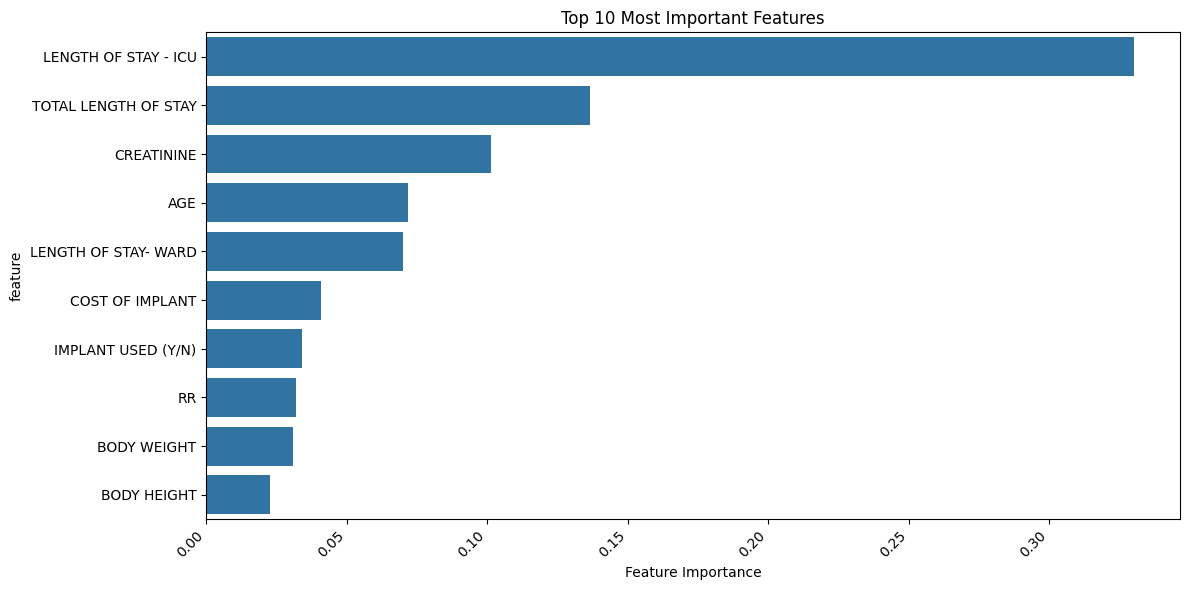

In [ ]:
# Feature Importance Plot
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

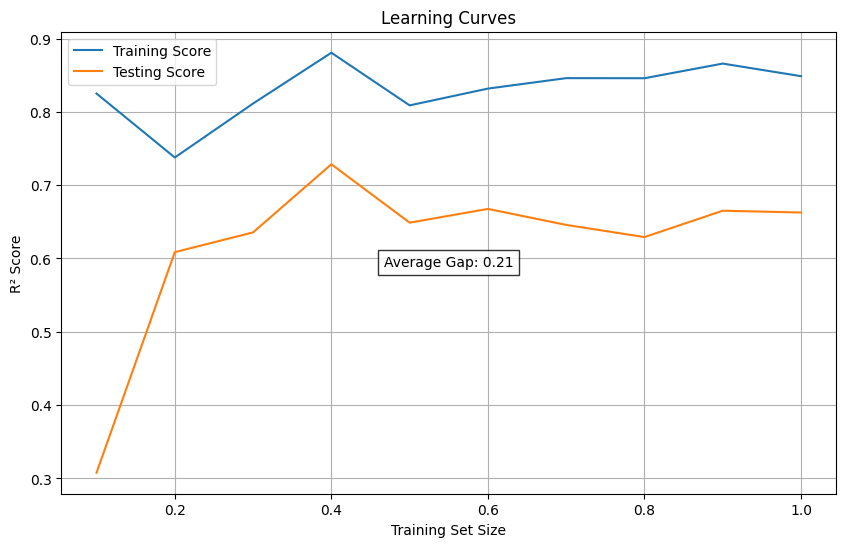

In [ ]:
# Learning Curves

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

train_scores = []
test_scores = []
train_sizes = np.linspace(0.1, 1.0, 10)

for size in train_sizes:
    # Calculate sample size
    n_samples = int(len(X_train) * size)

    # Train model on subset
    model = RandomForestRegressor(**grid_search.best_params_)
    model.fit(X_train[:n_samples], y_train[:n_samples])

    # Calculate scores
    train_scores.append(r2_score(y_train[:n_samples],
                                model.predict(X_train[:n_samples])))
    test_scores.append(r2_score(y_test, model.predict(X_test)))

# Calculate the gap for each training set size
gaps = np.array(train_scores) - np.array(test_scores)

# Calculate the average gap
average_gap = np.mean(gaps)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Score')
plt.plot(train_sizes, test_scores, label='Testing Score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)

# Add average gap annotation
plt.text(
    0.5,
    0.5,
    f"Average Gap: {average_gap:.2f}",
    ha="center",
    va="center",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.show()

The gap between two lines of the larning curve is 0.21 indicating a significant overfitting.

In [ ]:
# Removing overfitting
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Define the hyperparameter grid for tuning with a focus on regularization
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of trees (None for unlimited)
    'min_samples_split': [2, 5, 10], # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4], # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider
}

# Create and fit the GridSearchCV object
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

rf_grid.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = rf_grid.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the best hyperparameters
print("Best Hyperparameters:", rf_grid.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Mean Squared Error: 5217074387.529502
R-squared: 0.7249170925327504
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
162 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

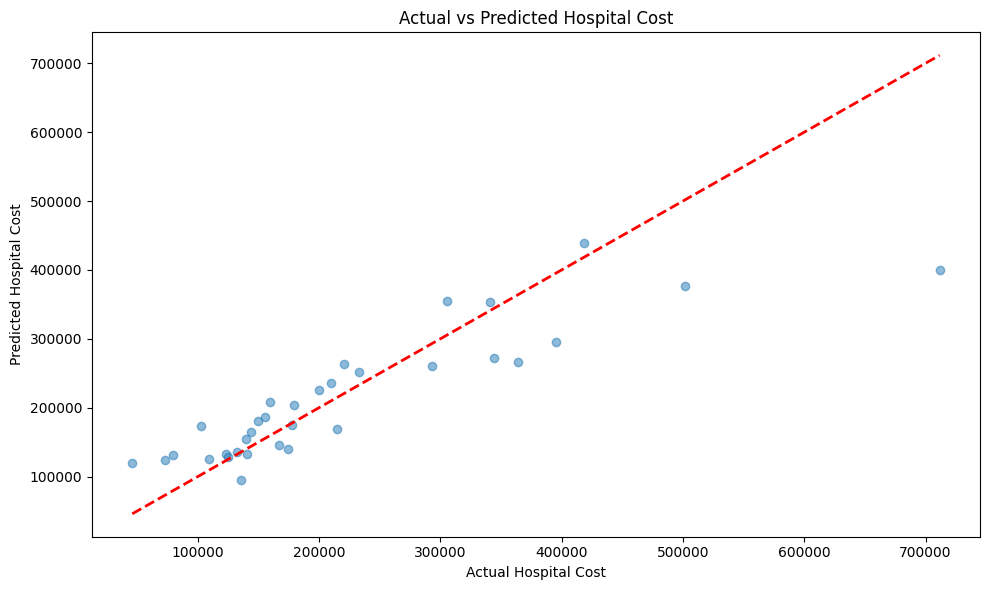

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Hospital Cost')
plt.ylabel('Predicted Hospital Cost')
plt.title('Actual vs Predicted Hospital Cost')
plt.tight_layout()
plt.show()

The plot visualizes the relationship between the actual hospital charges and the charges predicted by the model. Ideally, the points to be clustered closely around the red dashed line, which represents a perfect prediction where the actual and predicted values are equal.

**Clustering around the red line**: If the points are reasonably clustered around the red line, especially for lower charge values, it suggests the RandomForest Regressor model is performing well in capturing the general relationship between features and hospital charges.

2.KNN REGRESSOR

In [ ]:
# import necessary libraries for KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [ ]:
# Scale the features (essential for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Find the optimal k value using cross-validation OR we can decide this value, if have the prior knowledge about it.
from sklearn.model_selection import cross_val_score

k_values = range(1, 31)  # Test k from 1 to 30
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Find the optimal k
optimal_k = k_values[np.argmin(cv_scores)]
print(f"Optimal k value: {optimal_k}")


Optimal k value: 2


In [ ]:
# Train the KNN model with optimal k
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=2)

In [ ]:
# Make predictions
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 12605164049.506235
R² Score: 0.3353621362715873



Generating Learning Curve...


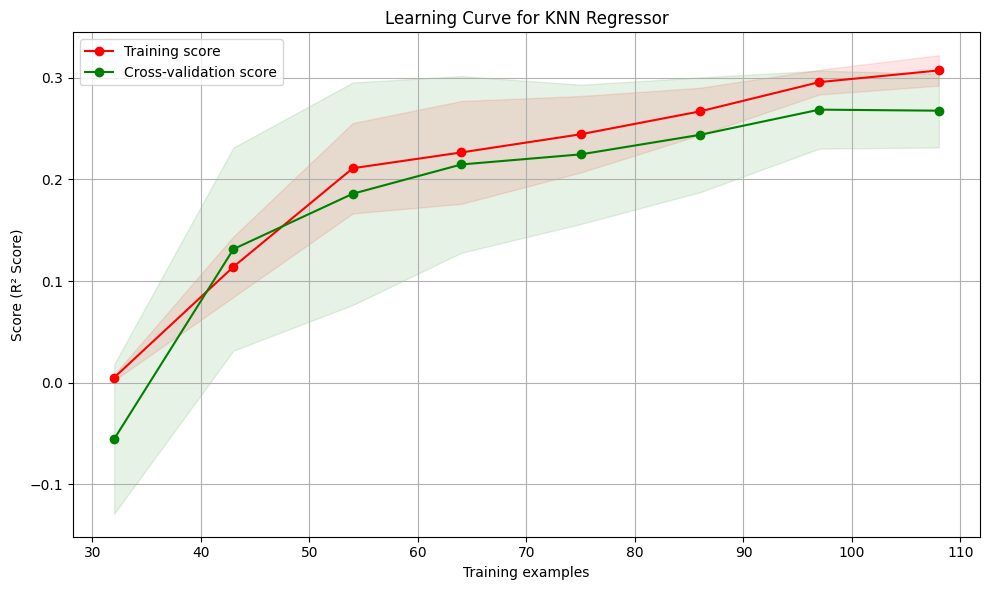

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=3,
                       n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score (R² Score)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='r2')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    return plt


# Combine training and test data for learning curve analysis
X_combined = np.vstack((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

# Generate and plot the learning curve
print("\nGenerating Learning Curve...")
plot_learning_curve(knn, X_combined, y_combined,
                   title="Learning Curve for KNN Regressor")
plt.show()


The gradual increase in both training and cross-validation scores indicates that the model's performance is steadily improving with more data. However, if the training score is still relatively low, it might suggest that the KNN model is struggling to fully capture the complexity of the dataset.

In [ ]:
# Find the optimal k value using cross-validation
k_values = range(1, 31)  # Test k from 1 to 30
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Find the optimal k
optimal_k = k_values[np.argmin(cv_scores)]
print(f"Optimal k value: {optimal_k}")


# Experiment with k values around the optimal k
k_range = range(optimal_k - 2, optimal_k + 3)  # Explore k values +/- 2 around optimal_k
# Ensure k values are within the valid range
k_range = [k for k in k_range if k > 0 and k <= 30]


best_k = optimal_k
best_score = float('inf')  # Initialize with a large value

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)

    # Calculate accuracy measures
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"k = {k}, MSE = {mse:.4f}, R² = {r2:.4f}")

    # Update best_k if current k has better performance (lower MSE)
    if mse < best_score:
        best_score = mse
        best_k = k


print(f"\nBest k value based on MSE: {best_k}")

# Train the final model with the best k
final_knn_model = KNeighborsRegressor(n_neighbors=best_k)
final_knn_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the final model
y_pred_final = final_knn_model.predict(X_test_scaled)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f'Final Model (k={best_k}) - Mean Squared Error: {mse_final:.4f}')
print(f'Final Model (k={best_k}) - R² Score: {r2_final:.4f}')




Optimal k value: 2
k = 1, MSE = 11611142431.8442, R² = 0.3878
k = 2, MSE = 12605164049.5062, R² = 0.3354
k = 3, MSE = 11344440154.6668, R² = 0.4018
k = 4, MSE = 9756760462.6916, R² = 0.4856

Best k value based on MSE: 4
Final Model (k=4) - Mean Squared Error: 9756760462.6916
Final Model (k=4) - R² Score: 0.4856


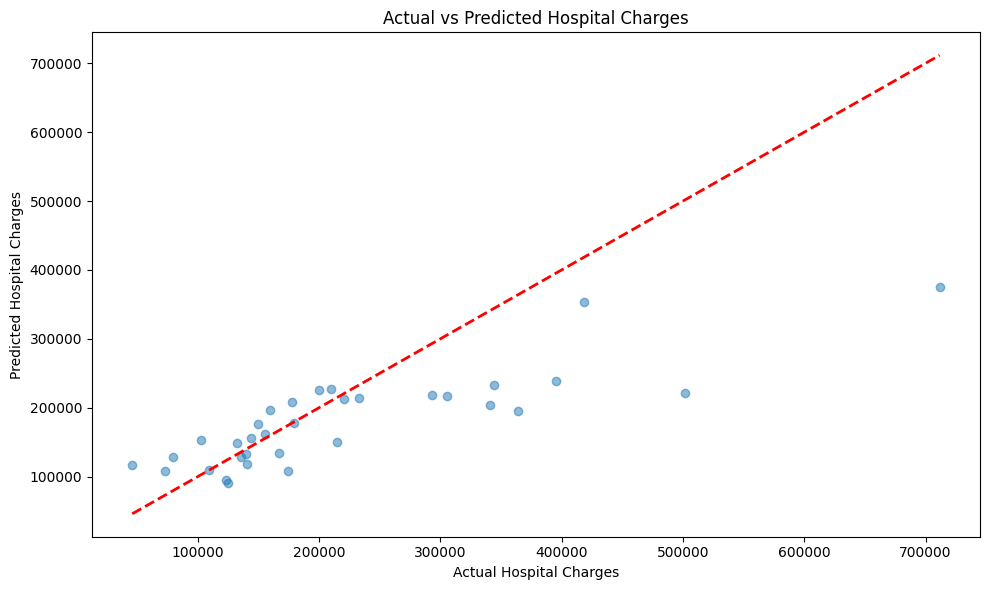

In [ ]:
# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Hospital Charges')
plt.ylabel('Predicted Hospital Charges')
plt.title('Actual vs Predicted Hospital Charges')
plt.tight_layout()
plt.show()

The plot visualizes the relationship between the actual hospital charges and the charges predicted by the model. Ideally, the points to be clustered closely around the red dashed line, which represents a perfect prediction where the actual and predicted values are equal.

**Clustering around the red line**: If the points are reasonably clustered around the red line, especially for lower charge values, it suggests the KNN model is performing well in capturing the general relationship between features and hospital charges.

**Potential outliers:** Look for any points far away from the line, especially those with high actual charges. These might represent cases where the model is struggling, and investigating them could reveal insights for improvement.

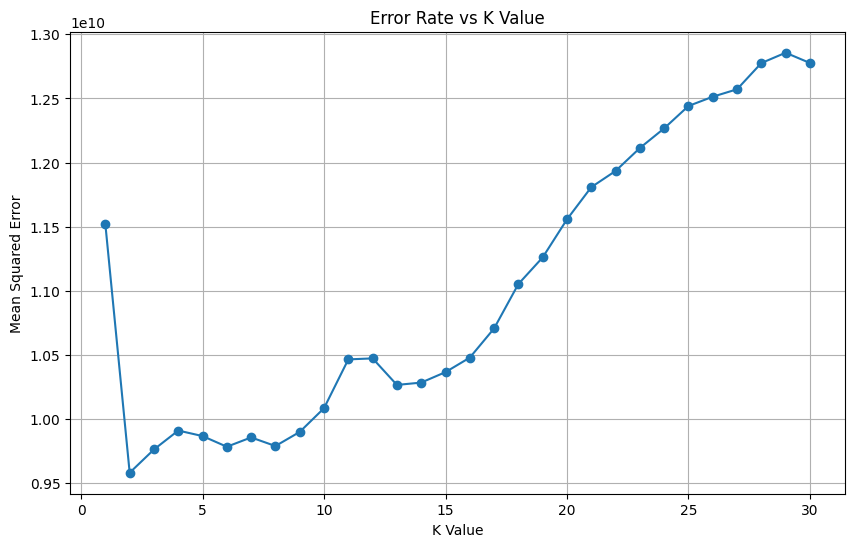

In [ ]:
# Plot k-value optimization
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('Error Rate vs K Value')
plt.grid(True)
plt.show()

Based on the Error Rate vs K Value plot, the MSE appears to be minimized around k=2. While the error rate shows a slight increase for k values greater than 2, the difference is relatively small within a certain range. Considering the trade-off between model complexity and performance, and the potential risk of overfitting with lower k values, k=2 seems to be a reasonable choice for the optimal value in this scenario.

3. Gradient Boosting Regressor

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize basic model
gb_model = GradientBoostingRegressor(random_state=42)

In [ ]:
# Perform initial cross-validation
cv_scores = cross_val_score(gb_model,
                          X_train,
                          y_train,
                          cv=3,
                          scoring='neg_mean_squared_error')

print("Initial Cross-Validation Scores:")
print(f"MSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

Initial Cross-Validation Scores:
MSE: 5602870916.09 (+/- 3949452431.75)


In [ ]:
# Parameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150], # Number of trees
    'learning_rate': [0.01, 0.05, 0.1], # How much each tree contributes
    'max_depth': [3, 4, 5],  # Maximum depth of each tree (number of levels of nodes it has, from the root node to the leaf nodes.)
    'min_samples_split': [2, 5], # Minimum samples required to split
    'min_samples_leaf': [1, 2]  # Minimum samples required at leaf
}

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)
# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", -grid_search.best_score_)



Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 5119968978.9045725


In [ ]:
# Train final model with best parameters
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=2,
                          n_estimators=50, random_state=42)

In [ ]:
# Make predictions
y_pred = best_gb_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 6794572916.972866
R² Score: 0.6417396544188037


                         feature  importance
17          LENGTH OF STAY - ICU    0.759025
20               COST OF IMPLANT    0.072335
10                            HB    0.050015
12                    CREATININE    0.037995
16          TOTAL LENGTH OF STAY    0.023564
9                             RR    0.016426
6                       HR PULSE    0.008991
18          LENGTH OF STAY- WARD    0.007702
19            IMPLANT USED (Y/N)    0.006171
5                    BODY HEIGHT    0.005632
0                            AGE    0.003901
11                          UREA    0.003196
4                    BODY WEIGHT    0.001591
15                 TYPE OF ADMSN    0.001235
7                       BP -HIGH    0.001170
8                         BP-LOW    0.000755
3           KEY COMPLAINTS -CODE    0.000295
13               MODE OF ARRIVAL    0.000000
14  STATE AT THE TIME OF ARRIVAL    0.000000
1                         GENDER    0.000000
2                 MARITAL STATUS    0.000000


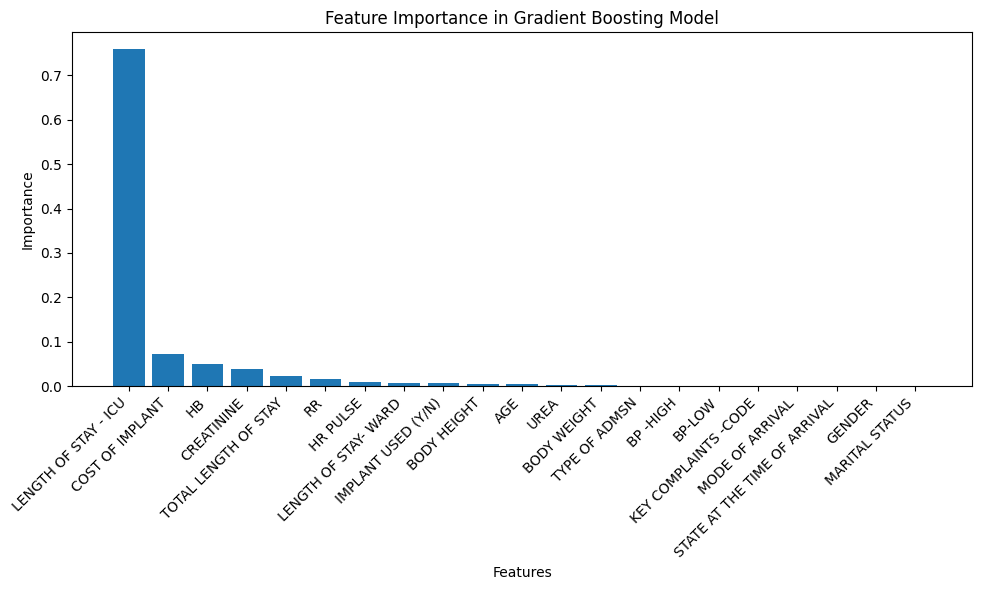

In [ ]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_gb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.tight_layout()
plt.show()

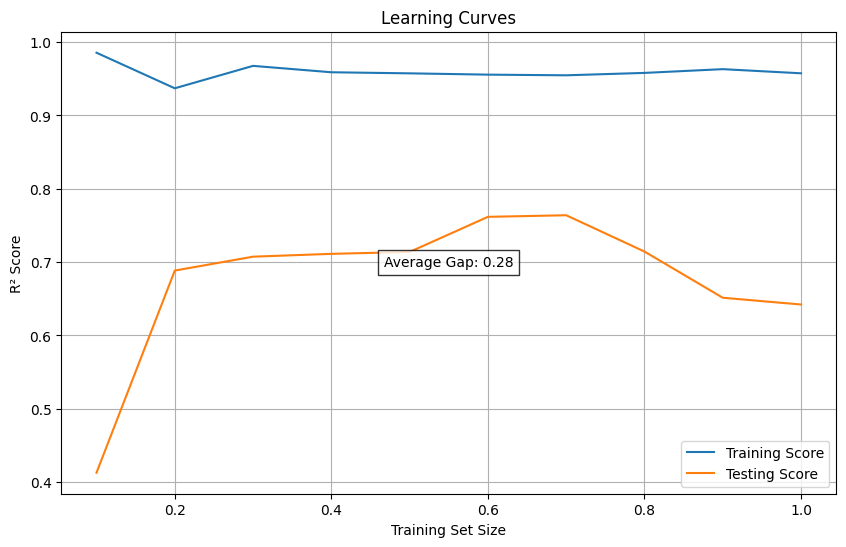

In [ ]:
# Learning Curves
train_scores = []
test_scores = []
train_sizes = np.linspace(0.1, 1.0, 10)

for size in train_sizes:
    # Calculate sample size
    n_samples = int(len(X_train) * size)

    # Train model on subset
    model = GradientBoostingRegressor(**grid_search.best_params_)
    model.fit(X_train[:n_samples], y_train[:n_samples])

    # Calculate scores
    train_scores.append(r2_score(y_train[:n_samples],
                                model.predict(X_train[:n_samples])))
    test_scores.append(r2_score(y_test, model.predict(X_test)))

# Calculate the gap for each training set size
gaps = np.array(train_scores) - np.array(test_scores)

# Calculate the average gap
average_gap = np.mean(gaps)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Score')
plt.plot(train_sizes, test_scores, label='Testing Score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)

# Add average gap annotation
plt.text(
    0.5,
    0.5,
    f"Average Gap: {average_gap:.2f}",
    ha="center",
    va="center",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.show()

The testing score starting at a lower value and gradually increasing. It indicates that the model is learning from the data and generalizing better as we add more training examples.

The curve suggests that we have enough data for current model's complexity. Adding significantly more data might not lead to substantial improvements in performance.

The testing score line stopped at around more than 0.6. However, it's lower than the peak around > 0.8, suggesting that the model might be slightly overfitting towards the end of the learning curve.

The training score graph shows a typical pattern for a well-behaved learning curve. The initial overfitting is reduced, the model learns more complex patterns with more data, and the performance eventually stabilizes.

However, the average gap between the training score and the testing score is 0.28, hence we can identify the significance level of overfitting.



In [ ]:
# Removing the overfitting of the model
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Regularization and Hyperparameter Tuning:
gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'alpha': [0.1, 0.5, 0.9],  # L1 regularization
}

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

# Evaluation:
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Hyperparameters: {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error: 6372878327.092668
R-squared: 0.6639745250054172


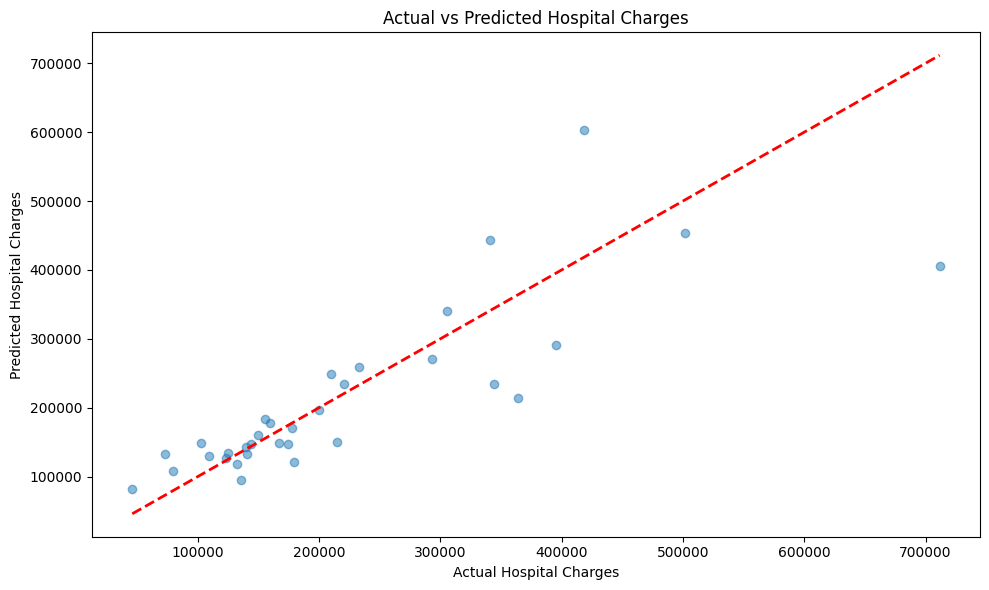

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Hospital Charges')
plt.ylabel('Predicted Hospital Charges')
plt.title('Actual vs Predicted Hospital Charges')
plt.tight_layout()
plt.show()

The plot visualizes the relationship between the actual hospital charges and the charges predicted by the model. Ideally, the points to be clustered closely around the red dashed line, which represents a perfect prediction where the actual and predicted values are equal.

**Clustering around the red line**: If the points are reasonably clustered around the red line, especially for lower charge values, it suggests the GradientBoosting Regressor model is performing well in capturing the general relationship between features and hospital charges.


4. eXtreme Gradient Boosting - XGBoost

In [ ]:
pip install xgboost --upgrade

In [ ]:
# import important libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create XGBoost regressor with initial parameters
xgb_model = xgb.XGBRegressor(
    n_estimators=1000, # model will build 100 tree sequentially
    learning_rate=0.1, # how much each tree contributes to the overall prediction
    max_depth=5, # each tree can have a maximum of 5 levels of nodes.
    min_child_weight=1, # minimum number of samples required to be at a leaf node.
    subsample=0.8, # the fraction of the training data to be used for each boosting round, meaning that 80% of the data will be randomly sampled for each tree.
    colsample_bytree=0.8,# the fraction of features to be used for each boosting round, meaning that 80% of the features will be randomly sampled for each tree, helps prevent overfitting and adds randomness to the model.
    eval_metric='rmse',# Metric to evaluate
    early_stopping_rounds= 20,
    random_state=42
)

In [ ]:
# Fit the model
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

[0]	validation_0-rmse:125371.44753	validation_1-rmse:129656.39866
[1]	validation_0-rmse:115697.64607	validation_1-rmse:122023.11187
[2]	validation_0-rmse:108016.64584	validation_1-rmse:114181.66903
[3]	validation_0-rmse:101787.89463	validation_1-rmse:111415.71499
[4]	validation_0-rmse:97884.36335	validation_1-rmse:109865.30885
[5]	validation_0-rmse:90424.78748	validation_1-rmse:105021.52364
[6]	validation_0-rmse:85651.46171	validation_1-rmse:98994.25451
[7]	validation_0-rmse:81345.28241	validation_1-rmse:94593.37570
[8]	validation_0-rmse:76929.41390	validation_1-rmse:89619.13948
[9]	validation_0-rmse:71653.73643	validation_1-rmse:87549.48038
[10]	validation_0-rmse:67178.44711	validation_1-rmse:84747.49318
[11]	validation_0-rmse:62449.03921	validation_1-rmse:82334.06870
[12]	validation_0-rmse:58465.66573	validation_1-rmse:80592.95072
[13]	validation_0-rmse:55322.88390	validation_1-rmse:79770.70249
[14]	validation_0-rmse:51853.68152	validation_1-rmse:78701.77524
[15]	validation_0-rmse:49

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4705050794.001939
R-squared: 0.7519147790399747


                         feature  importance
17          LENGTH OF STAY - ICU    0.485170
20               COST OF IMPLANT    0.129635
16          TOTAL LENGTH OF STAY    0.089675
19            IMPLANT USED (Y/N)    0.089031
18          LENGTH OF STAY- WARD    0.035429
9                             RR    0.022167
12                    CREATININE    0.021823
10                            HB    0.021004
5                    BODY HEIGHT    0.018435
0                            AGE    0.017132
4                    BODY WEIGHT    0.014596
6                       HR PULSE    0.014535
2                 MARITAL STATUS    0.009661
1                         GENDER    0.009437
7                       BP -HIGH    0.006060
8                         BP-LOW    0.005782
11                          UREA    0.004736
3           KEY COMPLAINTS -CODE    0.004701
13               MODE OF ARRIVAL    0.000991
14  STATE AT THE TIME OF ARRIVAL    0.000000
15                 TYPE OF ADMSN    0.000000


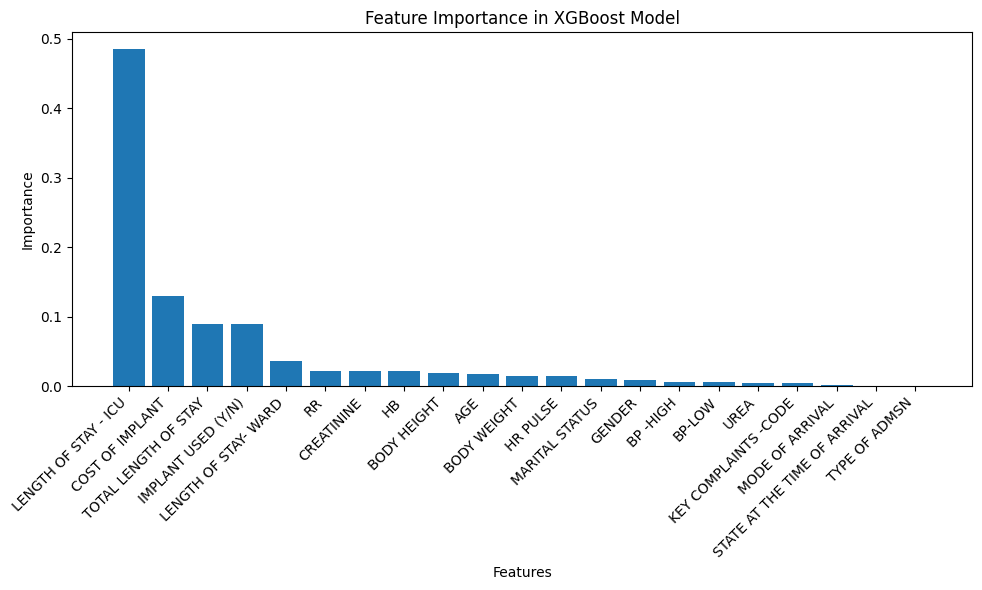

In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()

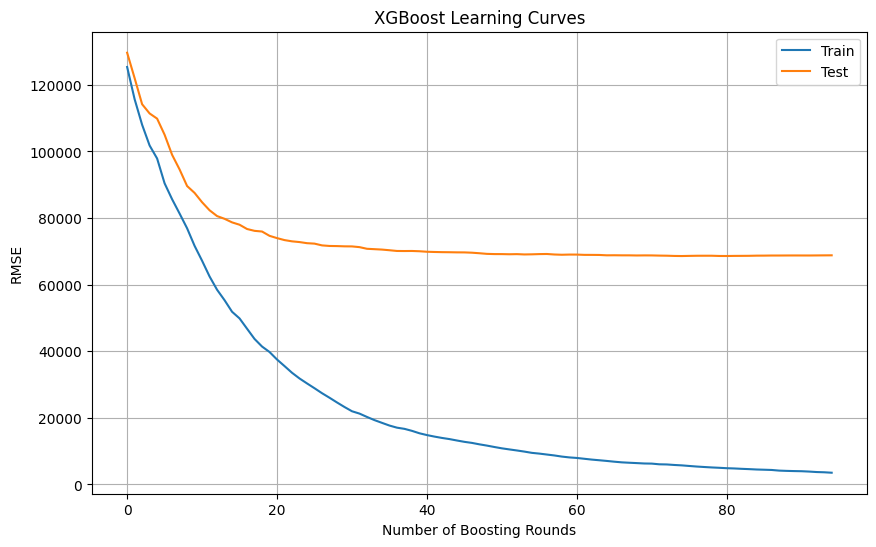

In [ ]:
# Learning curves plot
results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.legend()
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curves')
plt.grid()
plt.show()

According to the learning curve model has good fit on the data and there is not a chance of overfitting.

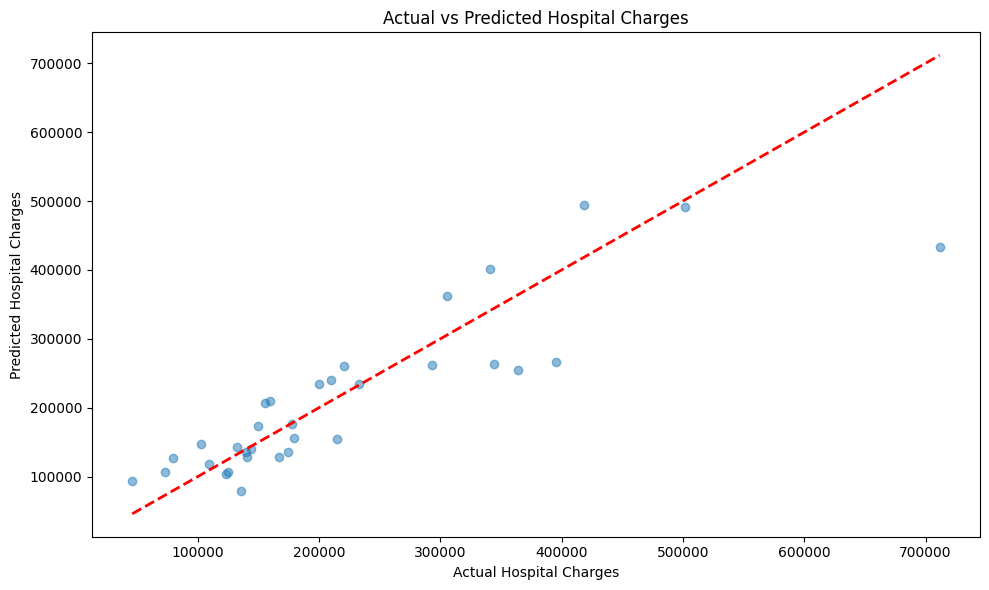

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Hospital Charges')
plt.ylabel('Predicted Hospital Charges')
plt.title('Actual vs Predicted Hospital Charges')
plt.tight_layout()
plt.show()

The plot visualizes the relationship between the actual hospital charges and the charges predicted by the model. Ideally, the points to be clustered closely around the red dashed line, which represents a perfect prediction where the actual and predicted values are equal.

**Clustering around the red line**: If the points are reasonably clustered around the red line, especially for lower charge values, it suggests the XGBoost model is performing well in capturing the general relationship between features and hospital charges.